# Boeing Orders and Deliveries: Descriptive Analysis
Disclaimer:  The goal of this project is to demonstrate to an employer my skills, my level of competence, and how my brain works overall(how I think and reason). I am not affiliated or endorsed by Boeing in any way. The dataset used in this analysis is publicly available on Boeing's website. As a result of not being affiliated with Boeing, I am limited in both my understanding of Boeing as a company and their datasets. Understand these limitations when viewing my analysis and conclusions.

Cutoff Date: November 2023
### Objective: Uncover insights that could be of value to the company.
### Note: The following questions are used to help guide me into more granular questions. They are not intended to only be met with simple answers.
#### Guiding questions:
1. What months receive the most orders? (evaluate over a 5, 10, 20, and 50 year time frame)
- Why it matters: Understanding an order cycle if there is one could help limit stress on business assets and increase efficiency of deliveries. This understanding would allow the company to anticipate busy and slow months limiting under and over production.
2. What Model Series is most ordered in each Region? (evaluate over a 5 and 10 year time frame)
- Why it matters: Understanding which model is most ordered in each region leads us to a follow up question which is "Why is that model most ordered in that region?". This could then lead us to analyzing the qualities/strengths of each model and comparing them to the region that is purchasing them. Answering the "why" can help the company to better understand their customer base. Due to the depth of this question, it is beyond the scope of my analysis.
3. What customers order more aircraft than anyone else? (evaluate Top 10 over a 5, 10, 20, and 50 year time frame)
- Why it matters: If the order volume is substantial enough, it may make sense to develop a more direct relationship with the customer and see if there's any pain points we can solve for them. End goal being for them to order even more. 


Disclaimer: The "Unfilled Orders" variable could have many causes and limitations that would be relevant for a real world analysis. For this analysis, the "Unfilled Orders" variable is being analyzed with little context. Just keep this in mind.

### Importing Libraries for Data Analysis and Visualization

In [1001]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading in CSV: Boeing Orders and Deliveries

In [1002]:
df = pd.read_csv(r'C:\Users\Logan Phillips\Downloads\OrdersandDeliveries.csv')

### Getting to know the data before starting the cleaning process

In [1003]:
df.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN


In [1004]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          9302 non-null   object
 1   Customer Name    9302 non-null   object
 2   Delivery Year    8222 non-null   object
 3   Engine           9302 non-null   object
 4   Model Series     9302 non-null   object
 5   Order Month      9302 non-null   object
 6   Order Year       9302 non-null   object
 7   Region           9276 non-null   object
 8   Delivery Total   9302 non-null   object
 9   Order Total      9302 non-null   object
 10  Unfilled Orders  362 non-null    object
dtypes: object(11)
memory usage: 799.5+ KB


In [1005]:
df.describe()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
count,9302,9302,8222,9302,9302,9302,9302,9276,9302,9302,362
unique,131,579,67,7,59,13,70,14,35,72,62
top,USA,United Airlines,2018,CF,737-800,Dec,2007,North America,1,1,2
freq,3296,356,210,3139,1208,1344,350,3527,3219,3458,45


# Cleaning
### Remove Duplicates

In [1006]:
df = df.drop_duplicates()

# Verifying changes
df.info()
# No duplicates found
# Remove Duplicates Complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          9302 non-null   object
 1   Customer Name    9302 non-null   object
 2   Delivery Year    8222 non-null   object
 3   Engine           9302 non-null   object
 4   Model Series     9302 non-null   object
 5   Order Month      9302 non-null   object
 6   Order Year       9302 non-null   object
 7   Region           9276 non-null   object
 8   Delivery Total   9302 non-null   object
 9   Order Total      9302 non-null   object
 10  Unfilled Orders  362 non-null    object
dtypes: object(11)
memory usage: 799.5+ KB


### Fix Format Issues

In [1007]:
# I'm combining the month and year columns to simplify certain tasks I may do like sorting and filtering.
# After attempting to combine the columns and use the to_datetime pandas function...
# I got an error message due to the value "All" which can be seen in the 2 outputs below.
df['Order Year'].unique()

array(['1968', '1969', '1978', '2005', '1974', '2014', '1970', '1976',
       '1975', '1989', '1972', '1998', '1983', '1979', '1981', '2003',
       '2009', '1999', '2017', '2006', '1985', '2012', '1984', '2023',
       '1980', '1992', '1973', '2016', '1965', '2013', '1971', '1990',
       '1988', '2000', '1963', '1977', '1966', '1987', '1986', '1991',
       '2001', '2021', '1960', '2004', '1995', '2018', '1961', '1997',
       '1964', '2002', '1956', '2015', '2007', '1967', '2010', '2011',
       '2020', '2008', '2022', '1993', '2019', '1996', '1957', '1955',
       '1959', '1962', '1982', '1994', '1958', 'All'], dtype=object)

In [1008]:
df['Order Month'].unique()

array(['Mar', 'Apr', 'Sep', 'Nov', 'Jan', 'Feb', 'May', 'Jun', 'Jul',
       'Oct', 'Dec', 'Aug', 'All'], dtype=object)

In [1009]:
df[df['Order Month'] == 'All']

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
9301,All,All,All,All,All,All,All,All,"24,836","35,394","5,914"


In [1010]:
df[df['Order Year'] == 'All']

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
9301,All,All,All,All,All,All,All,All,"24,836","35,394","5,914"


In [1011]:
# Removing row at index 9301
df = df[df['Order Year'] != 'All']

# Verifying changes
df.tail()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
9296,Zambia,Zambia Airways,1984,GE,DC-10,Nov,1983,Africa,1,1,NaN
9297,Zimbabwe,Air Zimbabwe,1987,PW,737-200,Jan,1987,Africa,2,2,NaN
9298,Zimbabwe,Air Zimbabwe,1990,PW,767-200ER,Mar,1989,Africa,1,1,NaN
9299,Zimbabwe,Air Zimbabwe,1989,PW,767-200ER,Jul,1988,Africa,1,1,NaN
9300,Zimbabwe,Air Zimbabwe,1986,PW,737-200,Dec,1986,Africa,1,1,NaN


In [1012]:
# Combining the Order Year and Order Month columns into one column.
df['Order Date'] = pd.to_datetime(df['Order Year'].astype(str) + '-' + df['Order Month'], format = '%Y-%b')

# Verifying changes
df.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN,1968-03-01
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN,1969-04-01
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN,1978-09-01
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN,2005-11-01
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN,1974-01-01


In [1013]:
# Issue indexing the Delivery Year column
df.columns
# There is a space at the end of "Delivery Year" that needs to be removed.

Index(['Country', 'Customer Name', 'Delivery Year ', 'Engine', 'Model Series',
       'Order Month', 'Order Year', 'Region', 'Delivery Total', 'Order Total',
       'Unfilled Orders', 'Order Date'],
      dtype='object')

In [1014]:
# Removing whitespaces from all column names
df.columns = df.columns.str.strip()

# Verifying changes
df.columns.tolist()

['Country',
 'Customer Name',
 'Delivery Year',
 'Engine',
 'Model Series',
 'Order Month',
 'Order Year',
 'Region',
 'Delivery Total',
 'Order Total',
 'Unfilled Orders',
 'Order Date']

In [1015]:
# Removing whitespaces from all df values.
for c in df.select_dtypes(include = 'object') :
    df[c] = df[c].str.strip()
# Fix Format Issues Complete

In [1016]:
# Checking for duplicates again
df[df.duplicated()]
# No duplicates found

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date


### Type Conversion

In [1017]:
# Changing my numeric columns to "Int64" dtype
numeric_columns = ['Order Total', 'Delivery Total', 'Delivery Year', 'Order Year', 'Unfilled Orders']
for c in numeric_columns :
    df[c] = pd.to_numeric(df[c].astype('Int64'))

# Verifying changes
df.info()
# Type Conversion Complete

<class 'pandas.core.frame.DataFrame'>
Index: 9301 entries, 0 to 9300
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          9301 non-null   object        
 1   Customer Name    9301 non-null   object        
 2   Delivery Year    8221 non-null   Int64         
 3   Engine           9301 non-null   object        
 4   Model Series     9301 non-null   object        
 5   Order Month      9301 non-null   object        
 6   Order Year       9301 non-null   Int64         
 7   Region           9275 non-null   object        
 8   Delivery Total   9301 non-null   Int64         
 9   Order Total      9301 non-null   Int64         
 10  Unfilled Orders  361 non-null    Int64         
 11  Order Date       9301 non-null   datetime64[ns]
dtypes: Int64(5), datetime64[ns](1), object(6)
memory usage: 990.0+ KB


### Fill or Remove Nulls

In [1018]:
# Checking to see what columns have null values
df.info()
# Columns with Nulls: "Delivery Year", "Region", "Unfilled Orders" 

<class 'pandas.core.frame.DataFrame'>
Index: 9301 entries, 0 to 9300
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          9301 non-null   object        
 1   Customer Name    9301 non-null   object        
 2   Delivery Year    8221 non-null   Int64         
 3   Engine           9301 non-null   object        
 4   Model Series     9301 non-null   object        
 5   Order Month      9301 non-null   object        
 6   Order Year       9301 non-null   Int64         
 7   Region           9275 non-null   object        
 8   Delivery Total   9301 non-null   Int64         
 9   Order Total      9301 non-null   Int64         
 10  Unfilled Orders  361 non-null    Int64         
 11  Order Date       9301 non-null   datetime64[ns]
dtypes: Int64(5), datetime64[ns](1), object(6)
memory usage: 990.0+ KB


In [1019]:
# *** This cell exists only to show some problem solving. After running this cell, I executed prior cells to undo my statements.

# I've noticed from previous outputs that the "Unfilled Orders" column is not accurate...
# Ex: 3 orders, 0 deliveries, yet unfilled orders is 0
# Updating "Unfilled Orders" column to reflect difference between "Order Total" and "Delivery Total"
# df['Unfilled Orders'] = df['Order Total'] - df['Delivery Total']

# Verifying changes
# df.head()

# Making sure there are no negative values for "Unfilled Orders"
# df[df['Unfilled Orders'] < 0]
# There are 10 rows with negative values. This leads me to believe that the data is either incorrect or I do not understand...
# the data. If I were working for Boeing, I would reach out to someone to help clarify how orders and deliveries are logged.

In [1020]:
# Replacing null values in the Unfilled Orders column with 0s because they represent counts and I will treat no count as 0
df['Unfilled Orders'] = df['Unfilled Orders'].fillna(0)

# Verifying changes
df.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,0,1968-03-01
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,0,1969-04-01
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,0,1978-09-01
3,Afghanistan,Ariana Afghan Airlines,<NA>,CF,737-700,Nov,2005,Central Asia,0,4,0,2005-11-01
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,0,1974-01-01


In [1021]:
# Checking for duplicates again
df[df.duplicated()]
# No duplicates found

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date


In [1022]:
# Inspecting null values in the region column
df[df.Region.isnull()]
# All of the null values for the region column exist for the country "Iran, Islamic Republic of"

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
2359,"Iran, Islamic Republic of",Airline of the Islamic Republi,<NA>,PW,727,Apr,1965,NaN,0,1,0,1965-04-01
2360,"Iran, Islamic Republic of",Airline of the Islamic Republi,1966,PW,727,Apr,1965,NaN,2,2,0,1965-04-01
2361,"Iran, Islamic Republic of",Airline of the Islamic Republi,1976,PW,747-200,Apr,1975,NaN,1,1,0,1975-04-01
2362,"Iran, Islamic Republic of",Airline of the Islamic Republi,1977,PW,747-200,Apr,1975,NaN,1,1,0,1975-04-01
2363,"Iran, Islamic Republic of",Airline of the Islamic Republi,1967,PW,727,May,1967,NaN,1,1,0,1967-05-01
2364,"Iran, Islamic Republic of",Airline of the Islamic Republi,1968,PW,727,May,1967,NaN,1,1,0,1967-05-01
2365,"Iran, Islamic Republic of",Airline of the Islamic Republi,<NA>,NS,747-100,Jun,1978,NaN,0,3,0,1978-06-01
2366,"Iran, Islamic Republic of",Airline of the Islamic Republi,1977,PW,747-100,Jun,1974,NaN,1,1,0,1974-06-01
2367,"Iran, Islamic Republic of",Airline of the Islamic Republi,1979,PW,747-100,Jun,1978,NaN,2,2,0,1978-06-01
2368,"Iran, Islamic Republic of",Airline of the Islamic Republi,1971,PW,737-200,Jul,1970,NaN,3,3,0,1970-07-01


In [1023]:
# Filtering for "Iran, Islamic Republic of" country to see if all of the region values for that country are null.
df[df.Country == 'Iran, Islamic Republic of']
# They are

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
2359,"Iran, Islamic Republic of",Airline of the Islamic Republi,<NA>,PW,727,Apr,1965,NaN,0,1,0,1965-04-01
2360,"Iran, Islamic Republic of",Airline of the Islamic Republi,1966,PW,727,Apr,1965,NaN,2,2,0,1965-04-01
2361,"Iran, Islamic Republic of",Airline of the Islamic Republi,1976,PW,747-200,Apr,1975,NaN,1,1,0,1975-04-01
2362,"Iran, Islamic Republic of",Airline of the Islamic Republi,1977,PW,747-200,Apr,1975,NaN,1,1,0,1975-04-01
2363,"Iran, Islamic Republic of",Airline of the Islamic Republi,1967,PW,727,May,1967,NaN,1,1,0,1967-05-01
2364,"Iran, Islamic Republic of",Airline of the Islamic Republi,1968,PW,727,May,1967,NaN,1,1,0,1967-05-01
2365,"Iran, Islamic Republic of",Airline of the Islamic Republi,<NA>,NS,747-100,Jun,1978,NaN,0,3,0,1978-06-01
2366,"Iran, Islamic Republic of",Airline of the Islamic Republi,1977,PW,747-100,Jun,1974,NaN,1,1,0,1974-06-01
2367,"Iran, Islamic Republic of",Airline of the Islamic Republi,1979,PW,747-100,Jun,1978,NaN,2,2,0,1978-06-01
2368,"Iran, Islamic Republic of",Airline of the Islamic Republi,1971,PW,737-200,Jul,1970,NaN,3,3,0,1970-07-01


In [1024]:
# Looking at the region values to see if I can appropriately assign a region to "Iran, Islamic Republic of"
df.Region.unique()

array(['Central Asia', 'Africa', 'South America', 'Oceania', 'Europe',
       'Caribbean', 'Middle East', 'South Asia', 'Southeast Asia',
       'North America', 'East Asia', 'Central America and Mexico', nan,
       'Unidentified'], dtype=object)

In [1025]:
# "Middle East" region best fits "Iran, Islamic Republic of"
iran_country = df.Country == 'Iran, Islamic Republic of'
updated_region = df.loc[iran_country, 'Region'].fillna('Middle East')
df.loc[iran_country, 'Region'] = updated_region

# Verifying changes
df[iran_country]

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
2359,"Iran, Islamic Republic of",Airline of the Islamic Republi,<NA>,PW,727,Apr,1965,Middle East,0,1,0,1965-04-01
2360,"Iran, Islamic Republic of",Airline of the Islamic Republi,1966,PW,727,Apr,1965,Middle East,2,2,0,1965-04-01
2361,"Iran, Islamic Republic of",Airline of the Islamic Republi,1976,PW,747-200,Apr,1975,Middle East,1,1,0,1975-04-01
2362,"Iran, Islamic Republic of",Airline of the Islamic Republi,1977,PW,747-200,Apr,1975,Middle East,1,1,0,1975-04-01
2363,"Iran, Islamic Republic of",Airline of the Islamic Republi,1967,PW,727,May,1967,Middle East,1,1,0,1967-05-01
2364,"Iran, Islamic Republic of",Airline of the Islamic Republi,1968,PW,727,May,1967,Middle East,1,1,0,1967-05-01
2365,"Iran, Islamic Republic of",Airline of the Islamic Republi,<NA>,NS,747-100,Jun,1978,Middle East,0,3,0,1978-06-01
2366,"Iran, Islamic Republic of",Airline of the Islamic Republi,1977,PW,747-100,Jun,1974,Middle East,1,1,0,1974-06-01
2367,"Iran, Islamic Republic of",Airline of the Islamic Republi,1979,PW,747-100,Jun,1978,Middle East,2,2,0,1978-06-01
2368,"Iran, Islamic Republic of",Airline of the Islamic Republi,1971,PW,737-200,Jul,1970,Middle East,3,3,0,1970-07-01


In [1026]:
# Inspecting the Delivery Year column to see how I want to handle nulls.
df[df['Delivery Year'].isnull()]

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
3,Afghanistan,Ariana Afghan Airlines,<NA>,CF,737-700,Nov,2005,Central Asia,0,4,0,2005-11-01
51,Angola,TAAG Angola Airlines,<NA>,GE,787-9,Sep,2023,Africa,0,2,2,2023-09-01
52,Angola,TAAG Angola Airlines,<NA>,GE,787-10,Sep,2023,Africa,0,2,2,2023-09-01
73,Argentina,Aerolineas Argentinas,<NA>,CF,737 MAX,Sep,2016,South America,0,9,5,2016-09-01
77,Argentina,Aerolineas Argentinas,<NA>,CF,737-800,Oct,2013,South America,0,14,0,2013-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
9281,Vietnam,VietJet Air,<NA>,CF,737 MAX,Dec,2018,Southeast Asia,0,100,100,2018-12-01
9290,Yemen,Yemenia,<NA>,NS,737-200,Dec,1977,Middle East,0,1,0,1977-12-01
9291,Yemen,Yemenia,<NA>,PW,727,Dec,1977,Middle East,0,1,0,1977-12-01
9293,Zambia,Zambia Airways,<NA>,NS,DC-10,Feb,1984,Africa,0,1,0,1984-02-01


In [1027]:
# Null values appear to only be in rows with a Delivery Total of 0.
# Verifying
delivered = df['Delivery Total'] > 0
dynull = df['Delivery Year'].isnull()
df[dynull & delivered]

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date


In [1028]:
df.info()
# Remaining null values only exist in the Delivery Year column. These nulls exist where there was no delivery.
# Fill or Remove Nulls Complete

<class 'pandas.core.frame.DataFrame'>
Index: 9301 entries, 0 to 9300
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          9301 non-null   object        
 1   Customer Name    9301 non-null   object        
 2   Delivery Year    8221 non-null   Int64         
 3   Engine           9301 non-null   object        
 4   Model Series     9301 non-null   object        
 5   Order Month      9301 non-null   object        
 6   Order Year       9301 non-null   Int64         
 7   Region           9301 non-null   object        
 8   Delivery Total   9301 non-null   Int64         
 9   Order Total      9301 non-null   Int64         
 10  Unfilled Orders  9301 non-null   Int64         
 11  Order Date       9301 non-null   datetime64[ns]
dtypes: Int64(5), datetime64[ns](1), object(6)
memory usage: 990.0+ KB


### Handle Outliers

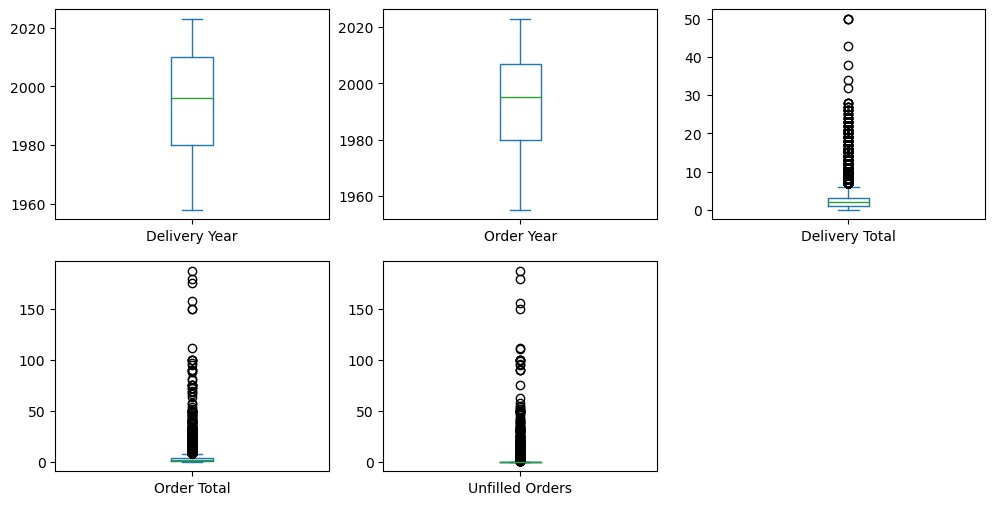

In [1029]:
# Examining each column for outliers
df.plot.box(subplots = True, layout = (2, -1), figsize = (12, 6), sharex = False, sharey = False)
plt.show()
# Based on my knowledge of this dataset, none of the variables show values that warrant removal.
# Handle Outliers Complete

### Validate data

In [1030]:
# Did review of my cleaning actions. No causes for concern.
# Reviewing summaries of my dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9301 entries, 0 to 9300
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          9301 non-null   object        
 1   Customer Name    9301 non-null   object        
 2   Delivery Year    8221 non-null   Int64         
 3   Engine           9301 non-null   object        
 4   Model Series     9301 non-null   object        
 5   Order Month      9301 non-null   object        
 6   Order Year       9301 non-null   Int64         
 7   Region           9301 non-null   object        
 8   Delivery Total   9301 non-null   Int64         
 9   Order Total      9301 non-null   Int64         
 10  Unfilled Orders  9301 non-null   Int64         
 11  Order Date       9301 non-null   datetime64[ns]
dtypes: Int64(5), datetime64[ns](1), object(6)
memory usage: 990.0+ KB


In [1031]:
df.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,0,1968-03-01
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,0,1969-04-01
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,0,1978-09-01
3,Afghanistan,Ariana Afghan Airlines,<NA>,CF,737-700,Nov,2005,Central Asia,0,4,0,2005-11-01
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,0,1974-01-01


In [1032]:
df.describe()
# Cleaning Complete

,Delivery Year,Order Year,Delivery Total,Order Total,Unfilled Orders,Order Date
count,8221.0,9301.0,9301.0,9301.0,9301.0,9301
mean,1994.565503,1993.259542,2.670251,3.805397,0.635846,1993-10-04 09:56:59.632297600
min,1958.0,1955.0,0.0,0.0,0.0,1955-10-01 00:00:00
25%,1980.0,1980.0,1.0,1.0,0.0,1980-02-01 00:00:00
50%,1996.0,1995.0,2.0,2.0,0.0,1995-09-01 00:00:00
75%,2010.0,2007.0,3.0,4.0,0.0,2007-06-01 00:00:00
max,2023.0,2023.0,50.0,187.0,187.0,2023-11-01 00:00:00
std,17.2473,16.683716,3.343291,7.487292,6.01074,NaN


# Exploration

## Answering the guiding questions
### Question 1
What months receive the most orders? (evaluate over a 5, 10, 20, and 50 year time frame)

In [1033]:
# Renaming region "Central America and Mexico" because it is obnoxiously long.
df['Region'] = df['Region'].replace('Central America and Mexico', 'CAM & Mexico')
# Verifying changes
df.Region.unique()

array(['Central Asia', 'Africa', 'South America', 'Oceania', 'Europe',
       'Caribbean', 'Middle East', 'South Asia', 'Southeast Asia',
       'North America', 'East Asia', 'CAM & Mexico', 'Unidentified'],
      dtype=object)

In [1034]:
# Creating variables that represent time frames
y5 = df[df['Order Date'] >= '2018-12-01']
y10 = df[df['Order Date'] >= '2013-12-01']
y20 = df[df['Order Date'] >='2003-12-01']
y50 = df[df['Order Date'] >= '1973-12-01']

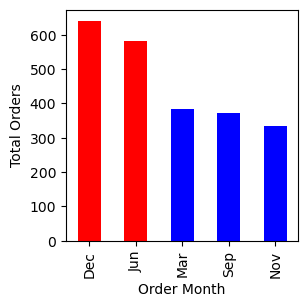

In [1035]:
# Top 5 months that received the most orders over the past 5 years.
y5list = y5.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).index.tolist()
colors = ['red', 'red', 'blue', 'blue', 'blue']
y5.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).plot.bar(figsize = (3,3), 
                                                                                                   color = colors)
plt.ylabel('Total Orders')
plt.show()

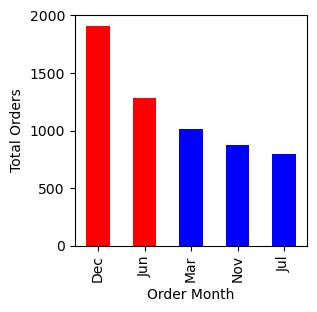

In [1036]:
# Top 5 months that received the most orders over the past 10 years.
y10list = y10.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).index.tolist()
y10.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).plot.bar(figsize = (3,3), 
                                                                                                    color = colors)
plt.ylabel('Total Orders')
plt.show()

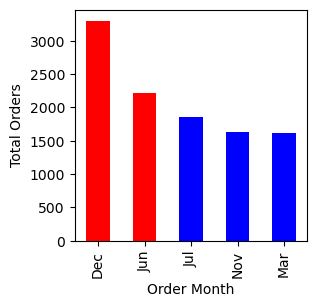

In [1037]:
# Top 5 months that received the most orders over the past 20 years.
y20list = y20.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).index.tolist()
y20.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).plot.bar(figsize = (3,3), 
                                                                                                    color = colors)
plt.ylabel('Total Orders')
plt.show()

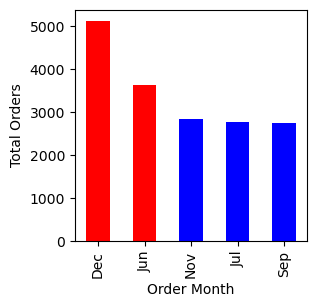

In [1038]:
# Top 5 months that received the most orders over the past 50 years.
y50list = y50.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).index.tolist()
y50.groupby('Order Month')['Order Total'].sum().nlargest(5).sort_values(ascending = False).plot.bar(figsize = (3,3), 
                                                                                                    color = colors)
plt.ylabel('Total Orders')
plt.show()

In [1039]:
# Months that are Top 5 in all 4 time frames
commonmonths = set(y5list) & set(y10list) & set(y20list) & set(y50list)
commonmonths

{'Dec', 'Jun', 'Nov'}

In [1040]:
# Months that are Top 5 in 3 most recent time frames
commonmonths51020 = set(y5list) & set(y10list) & set(y20list)
commonmonths51020

{'Dec', 'Jun', 'Mar', 'Nov'}

In [1041]:
# Months that are Top 5 in 2 most recent time frames
commonmonths510 = set(y5list) & set(y10list)
commonmonths510

{'Dec', 'Jun', 'Mar', 'Nov'}

#### Notable Months : December, June, March, and November
#### Top 2 Months : December and June
Notable Months rank in the Top 5 for orders across a 5, 10, and 20 year time frame.

Top 2 Months rank in the Top 2 for orders across a 5, 10, 20, and 50 year time frame.

In [1042]:
# What portion of orders does June make up over past 10 years?
y10.groupby('Order Month')['Order Total'].sum()
# Making a repeatable process for calculating percentage of Orders
y10jun = y10[y10['Order Month'] == 'Jun'].groupby('Order Month')['Order Total'].sum().values

# Order total over 10 year period
y10tot = y10['Order Total'].sum()
junportion10y = y10jun/y10tot
junportion10y

# June orders make up 14% of all orders over past 10 years

<FloatingArray>
[0.1409255798614928]
Length: 1, dtype: Float64

In [1043]:
# What portion of orders does December make up over past 10 years?
y10.groupby('Order Month')['Order Total'].sum()

y10dec = y10[y10['Order Month'] == 'Dec'].groupby('Order Month')['Order Total'].sum().values

# Order total over 10 year period
decportion10y = y10dec/y10tot
decportion10y

# December orders make up 21% of all orders over past 10 years

<FloatingArray>
[0.2101791799494339]
Length: 1, dtype: Float64

In [1044]:
# Evaluating highest recorded orders by month to add context to my insights. If one month received a mass amount of orders...
# it might have significantly affected my analysis.
df.groupby(['Order Year', 'Order Month'])['Order Total'].sum().reset_index().sort_values(
    by=['Order Total', 'Order Year', 'Order Month'], ascending = [False, True, False]).head(10)
# No results raise concern

,Order Year,Order Month,Order Total
370,1989,Apr,424
675,2014,Jul,324
660,2013,Dec,319
777,2023,Jun,304
696,2016,Dec,290
588,2007,Dec,287
636,2011,Dec,287
664,2013,Jun,287
708,2017,Dec,265
651,2012,Jul,260


## Question 1 Insights
Question: What months receive the most orders? (evaluate over a 5, 10, 20, and 50 year time frame)
### Insights
1. December, June, March, and November have ranked in the Top 5 among month order totals across a 5, 10, 20, and 50 year time frame.

2. December and June have ranked in the Top 2 among month order totals across a 5, 10, 20, and 50 year time frame.

3. December orders make up 21% of all orders over the last 10 years.

4. June orders make up 14% of all orders over the last 10 years.

### Question 2
What Model Series is most ordered in each Region (evaluate over a 5 and 10 year time frame)

In [1045]:
# 5 year analysis 
# Order total by model by region
modelordbyreg5 = y5.groupby(['Region', 'Model Series'])['Order Total'].sum().reset_index()

# Highest ordered model by region
highestordmod5 = modelordbyreg5.sort_values(['Region', 'Order Total'], ascending= [True, False]).groupby('Region').head(1)

# Sorting
sortedhom5 = highestordmod5.sort_values('Order Total', ascending = False).head(10)
sortedhom5

# 737 Max is a clear worldwide favorite over past 5 years

,Region,Model Series,Order Total
36,North America,737 MAX,1297
19,Europe,737 MAX,403
52,South Asia,737 MAX,266
55,Southeast Asia,737 MAX,161
61,Unidentified,737 MAX,126
32,Middle East,777X,120
12,East Asia,737 MAX,70
6,Caribbean,737 MAX,30
46,Oceania,737 MAX,25
51,South America,737 MAX,9


In [1046]:
# Middle East region over past 5 years primarily orders 777X but even still, 737 MAX is a close second.
y5[y5['Region'] == 'Middle East'].groupby(['Region', 'Model Series'])['Order Total'].sum().sort_values(ascending = False)

Region       Model Series
Middle East  777X            120
             737 MAX          92
             787-9            62
             787-10           36
             787-8            15
             777F             14
             767-2C            4
             777-300ER         1
Name: Order Total, dtype: Int64

In [1047]:
# 10 year analysis 
# Order total by model by region
modelordbyreg10 = y10.groupby(['Region', 'Model Series'])['Order Total'].sum().reset_index()

# Highest ordered model by region
highestordmod10 = modelordbyreg10.sort_values(['Region', 'Order Total'], ascending= [True, False]).groupby('Region').head(1)

# Sorting
sortedhom10 = highestordmod10.sort_values('Order Total', ascending = False).head(10)
sortedhom10

# 737 Max is a clear worldwide favorite over past 10 years

,Region,Model Series,Order Total
53,North America,737 MAX,1889
32,Europe,737 MAX,1107
90,Unidentified,737 MAX,748
78,South Asia,737 MAX,541
82,Southeast Asia,737 MAX,483
18,East Asia,737 MAX,445
44,Middle East,737 MAX,396
0,Africa,737 MAX,59
8,CAM & Mexico,737 MAX,56
71,Oceania,737 MAX,55


In [1048]:
# The Middle East has ordered more 777X over the past 5 years than they have ordered 737 Max.
# This appears to be a change of pace considering they ordered more 737 Max over a 10 year period. 
# I want to see what the past year looks like for top orders by Model Series.
# I'm curious to know if the 777X is a favorite in other regions for the most recent year.

# 1 Year time frame
y1 = df[df['Order Date'] >= '2022-12-01']

modelordbyreg1 = y1.groupby(['Region', 'Model Series'])['Order Total'].sum().reset_index()

# Highest ordered model series by region
highestordmod1 = modelordbyreg1.sort_values(['Region', 'Order Total'], ascending= [True, False]).groupby('Region').head(1)

# Sorting
sortedhom1 = highestordmod1.sort_values('Order Total', ascending = False).head(10)
sortedhom1

# Nothing significant found

,Region,Model Series,Order Total
11,North America,737 MAX,259
5,Europe,737 MAX,242
17,South Asia,737 MAX,194
8,Middle East,777X,106
23,Unidentified,737 MAX,49
20,Southeast Asia,737 MAX,47
4,East Asia,737 MAX,40
3,Central Asia,787-8,8
1,Africa,787-9,4
16,Oceania,787-8,2


In [1049]:
# Is Middle East most ordered model over past 5 years primarily due to a one year order value?
middleeast5 = df[(df['Region'] == 'Middle East') & (df['Order Date'] >= '2018-12-01') & (df['Model Series'] == '777X')]
middleeast5
# 90 of the 120 777X orders over the past 5 years were from one month worth of orders from one customer.

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
4150,Qatar,Qatar Airways,<NA>,GE,777X,Jan,2022,Middle East,0,14,14,2022-01-01
5523,United Arab Emirates,Emirates,<NA>,GE,777X,Jun,2023,Middle East,0,16,16,2023-06-01
5538,United Arab Emirates,Emirates,<NA>,GE,777X,Nov,2023,Middle East,0,90,90,2023-11-01


In [1050]:
# How many years does 777X order total rank over 737 Max for Middle East region?
middleeast777x = df[(df['Region'] == 'Middle East') & (df['Order Date'] >= '2013-12-01') & (df['Model Series'].isin(
    ['737 MAX','777X']))]
middleeast777x.groupby(['Region', 'Order Year', 'Model Series'])['Order Total'].sum()
# This wasnt the output I wanted but I'm interested to know if the 200 777X ordered in 2014 were delivered.

Region       Order Year  Model Series
Middle East  2013        737 MAX          75
             2014        777X            200
             2015        737 MAX          20
                         777X             10
             2016        737 MAX           3
             2017        737 MAX         206
             2018        737 MAX          50
             2021        737 MAX          17
             2022        737 MAX          25
                         777X             14
             2023        777X            106
Name: Order Total, dtype: Int64

In [1051]:
# What customers make up 777X orders in 2014
df[(df['Order Year'] == 2014) & (df['Region'] == 'Middle East') & (df['Model Series'] == '777X')]

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
4180,Qatar,Qatar Airways,<NA>,GE,777X,Jul,2014,Middle East,0,50,50,2014-07-01
5526,United Arab Emirates,Emirates,<NA>,GE,777X,Jul,2014,Middle East,0,150,99,2014-07-01


In [1052]:
# Were Middle East 2014 777x orders delivered to the Middle East in the past 10 years?
middleeast777x.groupby(['Region', 'Delivery Year', 'Model Series'])['Delivery Total'].sum()
# It doesnt appear like any 777X have been delivered

Region       Delivery Year  Model Series
Middle East  2017           737 MAX          6
             2018           737 MAX         10
             2019           737 MAX          1
             2021           737 MAX         15
             2022           737 MAX         30
             2023           737 MAX         21
Name: Delivery Total, dtype: Int64

In [1053]:
# How many unfilled orders do we have for 777X and 737 MAX?
middleeast777x.groupby(['Region', 'Delivery Year', 'Model Series'])['Unfilled Orders'].sum()
# This doesnt seem to reflect actual orders that have not been delivered considering over 300 777X have been ordered...
# in the past 10y in Middle East region

Region       Delivery Year  Model Series
Middle East  2017           737 MAX         0
             2018           737 MAX         0
             2019           737 MAX         0
             2021           737 MAX         0
             2022           737 MAX         0
             2023           737 MAX         0
Name: Unfilled Orders, dtype: Int64

In [1054]:
# Have any 777X been delivered?
# Delivery totals by region all time for 777X model series
df[df['Model Series'] == '777X'].groupby('Region')['Delivery Total'].sum()
# Delivery total and Unfilled Orders dont seem to accurately reflect what has and hasnt been delivered.

Region
Central Asia      0
East Asia         0
Europe            0
Middle East       0
South Asia        0
Southeast Asia    0
Unidentified      0
Name: Delivery Total, dtype: Int64

In [1055]:
# Testing previous statement with 737 MAX
df[df['Model Series'] == '737 MAX'].groupby('Region')['Delivery Total'].sum()
# We have recorded deliveries for 737 MAX but not for 777X 

Region
Africa             18
CAM & Mexico       55
Caribbean          10
Central Asia        1
East Asia         111
Europe            294
Middle East        83
North America     693
Oceania             5
South America      25
South Asia         10
Southeast Asia     61
Unidentified       10
Name: Delivery Total, dtype: Int64

In [1056]:
# How many 777X orders lack a helpful delivery status?
# All time total orders for 777X Model Series
df[df['Model Series'] == '777X'].groupby('Model Series')['Order Total'].sum()
# 510 all time orders for 777X and "0" unfilled orders and deliveries

Model Series
777X    510
Name: Order Total, dtype: Int64

In [1057]:
# What years does 777X order total rank over 737 Max for Middle East region? 10 year time frame
middleeast777x.groupby(['Region', 'Order Year', 'Model Series'])['Order Total'].sum().reset_index().sort_values(
    by = ['Order Year', 'Order Total'], ascending = [True, False])
# Evaluating rank by year isnt very valuable considering 777X received order totals of 200 in 2014 and 106 in 2023.
# 106 orders in 2023 helped to elevate 777X order total over 737 MAX order total for a 5 year period.

,Region,Order Year,Model Series,Order Total
0,Middle East,2013,737 MAX,75
1,Middle East,2014,777X,200
2,Middle East,2015,737 MAX,20
3,Middle East,2015,777X,10
4,Middle East,2016,737 MAX,3
5,Middle East,2017,737 MAX,206
6,Middle East,2018,737 MAX,50
7,Middle East,2021,737 MAX,17
8,Middle East,2022,737 MAX,25
9,Middle East,2022,777X,14


In [1058]:
# Confirming previous insight that 737 MAX orders rank over 777X orders for a 10 year period in Middle East region
middleeast777x.groupby(['Region', 'Model Series'])['Order Total'].sum()

Region       Model Series
Middle East  737 MAX         396
             777X            330
Name: Order Total, dtype: Int64

In [1059]:
# I'm curious to see second highest ordered model by region
# 5 year time frame
# 2 highest ordered model series by Region
highest2ordmod5 = modelordbyreg5.sort_values(['Region', 'Order Total'], ascending= [True, False]).groupby('Region').head(2)

# Sorting
highest2ordmod5

# 737 Max has practically no competition in terms of worldwide demand.
# Excluding regions with few relative orders, the Middle East is the only region with a tight gap between their...
# 1st and 2nd most ordered Model Series.

,Region,Model Series,Order Total
2,Africa,777F,5
5,Africa,787-9,4
6,Caribbean,737 MAX,30
11,Central Asia,787-8,8
9,Central Asia,777F,5
12,East Asia,737 MAX,70
15,East Asia,777F,22
19,Europe,737 MAX,403
27,Europe,787-9,51
32,Middle East,777X,120


In [1062]:
# Grouping Middle East 777X orders by customer for the last 10 years
df[(df['Order Date'] >= '2013-12-01') & (df['Region'] == 'Middle East') & (df['Model Series'] == '777X')].groupby(
    'Customer Name')['Order Total'].sum().sort_values(ascending = False)

Customer Name
Emirates         256
Qatar Airways     74
Name: Order Total, dtype: Int64

In [1063]:
# Middle East single month 777X orders for the last 10 years
df[(df['Order Date'] >= '2013-12-01') & (df['Region'] == 'Middle East') & (df['Model Series'] == '777X')].groupby([
    'Order Year', 'Order Month'])['Order Total'].sum().reset_index().sort_values(
    by = ['Order Year', 'Order Month'], ascending = [True, False])

,Order Year,Order Month,Order Total
0,2014,Jul,200
1,2015,Jun,10
2,2022,Jan,14
4,2023,Nov,90
3,2023,Jun,16


In [1065]:
# Is there a pattern of bulk orders being made for 777X in the Middle East region?
# Evaluating over a 20 year time frame
# Middle East single month 777X orders for the last 20 years
df[(df['Order Date'] >= '2003-12-01') & (df['Region'] == 'Middle East') & (df['Model Series'] == '777X')].groupby([
    'Order Year', 'Order Month'])['Order Total'].sum().reset_index().sort_values(
    by = ['Order Year', 'Order Month'], ascending = [True, False])
# According to Boeing's website, the 777X was launched in 2013 which explains the data cutoff.

,Order Year,Order Month,Order Total
0,2011,Nov,6
1,2013,Nov,25
2,2014,Jul,200
3,2015,Jun,10
4,2022,Jan,14
6,2023,Nov,90
5,2023,Jun,16


## Question 2 Insights
Question : What Model Series is most ordered in each Region? (evaluate over a 5 and 10 year time frame)
### Insights
1. 737 Max is a clear worldwide favorite based on both a 5 and a 10 year time frame. It is difficult to even find a reason to talk about any other Model Series. 
2. The customer "Emirates" ordered 90 777X models in November of 2023 which helped elevate total 777X orders for the entire Middle East region over total 737 MAX orders for the last 5 years. This is a change of pace considering the Middle East 10 year highest ordered model is the 737 MAX. The 777X and 737 MAX have however been in close competition over the last 10 years in the Middle East. In the last 10 years, the Middle East region has ordered 396 737 MAX and 330 777X. 
    
    The 10 year 777X orders were made by just 2 customers :

    Emirates          256 orders
    
    Qatar Airways      74 orders
    
    
    These 777X orders were made over a 10 year period yet 290 of these orders were made in just 2 months (200 orders in July of 2014 & 90 orders in November of 2023).
    
    Considering the 777X was launched in 2013, these are very promising insights.

### Question 3
What customers order more aircraft than anyone else? (evaluate Top 10 over a 5, 10, 20, and 50 year time frame)

Consideration: Customers with significant order volume in recent years may make their way up the ranks across all time frames. This analysis will not be digging into that.

Ex: Company A buys a million aircraft in one year and has never previously done business with Boeing but yet makes the Top 10 list for orders in every time frame.

For the sake of this analysis, the Company A example would make the list of top customers.

In [1066]:
# Top 10 Customers by Order Total past 5 years
t10c5y = y5.groupby('Customer Name')['Order Total'].sum().reset_index().sort_values(by = 'Order Total',
                                                                                    ascending = False).head(10)

# Top 10 Customers by Order Total past 10 years
t10c10y = y10.groupby('Customer Name')['Order Total'].sum().reset_index().sort_values(by = 'Order Total',
                                                                                    ascending = False).head(10)
# Top 10 Customers by Order Total past 20 years
t10c20y = y20.groupby('Customer Name')['Order Total'].sum().reset_index().sort_values(by = 'Order Total',
                                                                                    ascending = False).head(10)
# Top 10 Customers by Order Total past 50 years
t10c50y = y50.groupby('Customer Name')['Order Total'].sum().reset_index().sort_values(by = 'Order Total',
                                                                                    ascending = False).head(10)

In [1067]:
# Customers that have been apart of the Top 10 customers across time frames(5, 10, 20, 50 years)
tc5102050 = set(t10c5y['Customer Name']) & set(t10c10y['Customer Name']) & set(t10c20y['Customer Name']) & set(
    t10c50y['Customer Name'])
tc5102050

{'Emirates',
 'Ryanair',
 'Southwest Airlines',
 'Unidentified Customer(s)',
 'United Airlines'}

In [1068]:
# Customers that have been apart of the Top 10 customers across time frames(5, 10, 20 years)
tc51020 = set(t10c5y['Customer Name']) & set(t10c10y['Customer Name']) & set(t10c20y['Customer Name'])
tc51020

{'Emirates',
 'Ryanair',
 'Southwest Airlines',
 'Unidentified Customer(s)',
 'United Airlines'}

In [1069]:
# Customers that have been apart of the Top 10 customers across time frames(5, 10 years)
tc510 = set(t10c5y['Customer Name']) & set(t10c10y['Customer Name'])
tc510
# VietJet Air and Air India are the only 2 customers that are not in any of the previous lists.

{'Air India',
 'Emirates',
 'Ryanair',
 'Southwest Airlines',
 'Unidentified Customer(s)',
 'United Airlines',
 'VietJet Air'}

In [1070]:
# Evaluating order volume from VietJet Air
df[df['Customer Name'] == 'VietJet Air']
# Their order volume is very significant. According to VietJet Airs website, they were established in 2007.
# VietJet Air is a significant new customer for Boeing.

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders,Order Date
9280,Vietnam,VietJet Air,<NA>,CF,737 MAX,May,2016,Southeast Asia,0,100,100,2016-05-01
9281,Vietnam,VietJet Air,<NA>,CF,737 MAX,Dec,2018,Southeast Asia,0,100,100,2018-12-01


In [1071]:
# Evaluating order volume from Air India
df[df['Customer Name'] == 'Air India'].groupby('Order Year')['Order Total'].sum().reset_index().sort_values(
    by = 'Order Year', ascending = False)
# Air India has been doing business with Boeing for almost 70 years.
# They submitted an abnormally high amount of orders in 2023 relative to past years.
# Their 2023 order of 220 is over 3x more orders than their next highest order year.

,Order Year,Order Total
21,2023,220
20,2005,68
19,1995,2
18,1991,4
17,1987,2
16,1983,2
15,1981,4
14,1980,1
13,1979,10
12,1978,1


In [1072]:
# Evaluating 2005 and 2023 orders for Air India
df[(df['Customer Name'] == 'Air India') & (df['Order Year'] >= 2005)].groupby(
    ['Order Year', 'Model Series'])['Order Total'].sum()

Order Year  Model Series
2005        737-800          18
            777-200LR         8
            777-300ER        15
            787-8            27
2023        737 MAX         190
            777X             10
            787-9            20
Name: Order Total, dtype: Int64

In [1073]:
# Top customers past 5 years
t10c5y

,Customer Name,Order Total
95,United Airlines,543
86,Southwest Airlines,412
80,Ryanair,225
7,Air India,220
94,Unidentified Customer(s),199
55,Emirates,143
12,Alaska Airlines,109
50,Delta Air Lines,100
96,VietJet Air,100
28,BDS USAF Tanker Program,87


In [1074]:
# Top customers past 10 years
t10c10y
# Very notable amount of orders from Unidentified Customers

,Customer Name,Order Total
174,Unidentified Customer(s),976
175,United Airlines,694
156,Southwest Airlines,539
141,Ryanair,368
86,Emirates,293
187,flydubai,262
14,Air India,220
45,BOC Aviation Limited,216
178,VietJet Air,200
108,Jet Airways,175


In [1075]:
# Top customers past 20 years
t10c20y

,Customer Name,Order Total
240,Unidentified Customer(s),1136
218,Southwest Airlines,1031
241,United Airlines,993
192,Ryanair,738
151,Lion Air,458
107,Emirates,423
33,American Airlines,410
167,NAS Aviation Services LLC,401
20,Air Lease Corporation,385
256,flydubai,312


In [1076]:
# Top customers past 50 years
t10c50y.head(10)

,Customer Name,Order Total
498,United Airlines,2000
446,Southwest Airlines,1525
81,American Airlines,1202
497,Unidentified Customer(s),1160
182,Delta Air Lines,992
407,Ryanair,891
260,International Lease Finance Co,839
342,NAS Aviation Services LLC,674
308,Lion Air,458
205,Emirates,432


In [1077]:
# What are United Airlines and Southwest Airlines primarily ordering? All time
df[df['Customer Name'].isin(['United Airlines', 'Southwest Airlines'])].groupby(
    ['Customer Name', 'Model Series'])['Order Total'].sum().sort_values(ascending = False)
# 737 MAX clear winner with a few trailing competitors.

Customer Name       Model Series
Southwest Airlines  737 MAX         692
United Airlines     737 MAX         546
Southwest Airlines  737-700         409
United Airlines     727             281
Southwest Airlines  737-800         205
United Airlines     787-9           198
                    737-500         193
Southwest Airlines  737-300         150
United Airlines     737-900ER       145
                    757-200         141
                    737-800         135
                    737-300         110
                    DC-8            108
                    737-200          75
                    747-400          74
                    DC-10            73
                    737-700          73
                    777-200ER        59
                    707/720          55
Southwest Airlines  737-200          49
United Airlines     777-200          40
                    767-300ER        40
                    767-200          39
                    787-10           27
Southwe

In [1078]:
# What are United Airlines and Southwest Airlines primarily ordering? Past 10 years
df[(df['Customer Name'].isin(['United Airlines', 'Southwest Airlines'])) & (df['Order Date'] >= '2013-11-01')].groupby(
    ['Customer Name', 'Model Series'])['Order Total'].sum().sort_values(ascending = False)
# 737 MAX clear winner, nothing comes close

Customer Name       Model Series
Southwest Airlines  737 MAX         512
United Airlines     737 MAX         446
                    787-9           165
Southwest Airlines  737-800          47
United Airlines     737-700          37
                    777-300ER        22
                    737-800          11
                    787-10            7
                    737-900ER         6
Name: Order Total, dtype: Int64

## Question 3 Insights
What customers order more aircraft than anyone else? (evaluate Top 10 over a 5, 10, 20, and 50 year time frame)

### The following customers exist in the Top 10 for Order Total across a 5, 10, 20, and 50 year time frame:

 Emirates
 
 Ryanair
 
 Southwest Airlines
 
 Unidentified Customer(s)
 
 United Airlines
 
 
### Up and comer:
 
#### VietJet Air

VietJet Air is a new customer for Boeing and in the last 8 years they have submitted 2 separate orders of 100 for the 737 MAX.

Those 2 large orders landed them in not just the Top 10 for orders over the past 5 years but also the Top 10 for orders over the past 10 years.

According to VietJet Air's website, they were established in 2007. Having submitted 200 orders for the 737 MAX in less than 10 years, this new customer is very significant.

 
### Notable customer:
 
#### Air India

Air India has been doing business with Boeing for almost 70 years and had never submitted more than 10 orders in a single year until 2005.

In 2005 they submitted a record 68 orders and in 2023 they broke that record with 220 orders. 

The 737 MAX made up the bulk of their 2023 orders with 190 orders.

### Top 2 Customers excluding "Unidentified  Customer(s)"

#### United Airlines
#### Southwest Airlines
Both customers rank in the Top 2 for order total across a 5, 10, 20, and 50 year time frame.

In the past 10 years, Boeing has received 958 737 MAX orders from these 2 customers.